In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Урок 2. Масштабирование признаков. L1 и L2 регуляризация. Стохастический градиентный спуск.

**1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод.**

In [4]:
# Пространство признаков. Стаж, цена занятия и квалификация.
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

# Целевая переменная (средний балл ЕГЭ)
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

In [5]:
# Стандартизация вектора x
calc_std_fit = lambda x: (x - x.mean()) / x.std()

In [6]:
# mean square error
calc_mse = lambda y, y_pred: np.mean((y - y_pred)**2)

In [7]:
# Расчет модели методом градиентного спуска с использованием L2 регуляризации
def eval_model_reg_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8, qty_in_batch=4):
    # начальные весовые коэффициенты
    W = np.random.randn(X.shape[0])

    # размер выборки
    n = X.shape[1]

    # число батчей
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    # шаг градиентного спуска
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            
            W -= alpha * (2 * X_tmp @ (y_pred_tmp - y_tmp) / n + lambda_ * W)
    return W

In [8]:
# Стандартизируем пространство признаков.
X_st = X.copy().astype(np.float64)

for i in range(1, X_st.shape[0]):
    X_st[i] = calc_std_fit(X_st[i])

In [11]:
# Посчитаем весовые коэффициенты для разных значений коэффициента регуляризации от 0 до 0.1.
lambda_arr = np.linspace(0, 10, 51)
w = np.array([eval_model_reg_l2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lambda_) for lambda_ in lambda_arr])

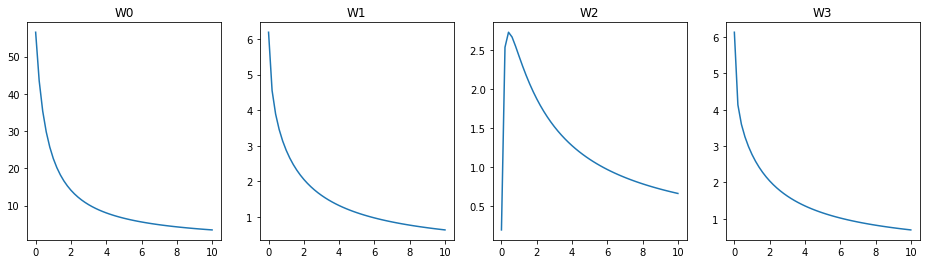

In [12]:
# Строим графики полученных весов.
w_size = w.shape[1]
fig, axs = plt.subplots(1, w_size, figsize=(16, 4))

for i in range(w_size):
    axs[i].plot(lambda_arr, w[:,i])
    axs[i].set_title(f'W{i}')
    
plt.show()

Вывод: При увеличении коэффициента регуляризации $\lambda$ весовые коэффициенты модели уменьшаются по экспоненте.

**2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Да, можно. Можно применить последовательно норамализацию и стандартизацию, или наоборот.

**3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.**

In [13]:
# Расчет модели методом градиентного спуска с использованием L1 регуляризации
def eval_model_reg_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8, qty_in_batch=4):
    # начальные весовые коэффициенты
    W = np.random.randn(X.shape[0])

    # размер выборки
    n = X.shape[1]

    # число батчей
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    # шаг градиентного спуска
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            
            W -= alpha * (2 * X_tmp @ (y_pred_tmp - y_tmp) / n + lambda_ * np.sign(W))
    return W

Разница в том что при вычислении весов на следующем шаге вклад ошибки не зависит от величины весов, а определяется только знаком производной и штрафным коэффициентом $\lambda$, так как $|W|' = sign(W)$.